In [4]:
import pandas as pd

In [5]:
df_train=pd.read_csv('/content/train.csv',sep=';')
df_test=pd.read_csv('/content/test.csv',sep=';')

In [6]:
df_train.head()

,text,label
0,dark agenda behind globalism open border altma...,0.0
1,america poor still get shaft sami jamil jadall...,0.0
2,number accuser grow former miss finland accuse...,0.0
3,heroic prego advertisement replaces refresh we...,0.0
4,russia syria debbie reynolds thursday even bri...,1.0


In [7]:
df_test.head()

,text,label
0,trump promise new deal black america trump pro...,0.0
1,foundation tie bedevil hillary clinton preside...,1.0
2,number week long russia end oil dependence rbt...,0.0
3,codesod rule ten remy porter remy escape enter...,0.0
4,switch chip know anymore home scitech switch c...,0.0


In [8]:
## Get the Independent Features

X=df_train.drop('label',axis=1)

In [9]:
X.head()

,text
0,dark agenda behind globalism open border altma...
1,america poor still get shaft sami jamil jadall...
2,number accuser grow former miss finland accuse...
3,heroic prego advertisement replaces refresh we...
4,russia syria debbie reynolds thursday even bri...


In [10]:
## Get the Dependent features
y=df_train['label']

In [11]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
Name: label, dtype: float64

In [12]:
df_train.shape

(2482, 2)

In [13]:
z=df_test['label']

In [14]:
z.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [15]:
df_test.shape

(2064, 2)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
df_train=df_train.dropna()

In [18]:
df_train.head(10)

,text,label
0,dark agenda behind globalism open border altma...,0.0
1,america poor still get shaft sami jamil jadall...,0.0
2,number accuser grow former miss finland accuse...,0.0
3,heroic prego advertisement replaces refresh we...,0.0
4,russia syria debbie reynolds thursday even bri...,1.0
5,come ice age consciousness afterlife come ice ...,0.0
6,russia ask cia hillary clinton buy million wor...,0.0
7,supreme court say police may use evidence find...,1.0
8,msnbc screw interview two africanamerican dona...,0.0
9,trump vow quick action stop terrorism setback ...,1.0


In [19]:
len(df_train)

2481

In [20]:
df_test=df_test.dropna()

In [21]:
df_test.head(10)

,text,label
0,trump promise new deal black america trump pro...,0.0
1,foundation tie bedevil hillary clinton preside...,1.0
2,number week long russia end oil dependence rbt...,0.0
3,codesod rule ten remy porter remy escape enter...,0.0
4,switch chip know anymore home scitech switch c...,0.0
5,donald trump russia rodrigo duterte thursday b...,1.0
6,mattis iraq oil reuters u military iraq seize ...,1.0
7,fbi actually investigate candidate hillary cli...,0.0
8,inperson coach university versus technology pr...,0.0
9,obama doj handmaiden clinton corruption go art...,0.0


In [22]:
len(df_test)

2063

In [23]:
messages1=df_train.copy()

In [24]:
messages1.reset_index(inplace=True)

In [25]:
messages1.head(10)

,index,text,label
0,0,dark agenda behind globalism open border altma...,0.0
1,1,america poor still get shaft sami jamil jadall...,0.0
2,2,number accuser grow former miss finland accuse...,0.0
3,3,heroic prego advertisement replaces refresh we...,0.0
4,4,russia syria debbie reynolds thursday even bri...,1.0
5,5,come ice age consciousness afterlife come ice ...,0.0
6,6,russia ask cia hillary clinton buy million wor...,0.0
7,7,supreme court say police may use evidence find...,1.0
8,8,msnbc screw interview two africanamerican dona...,0.0
9,9,trump vow quick action stop terrorism setback ...,1.0


In [26]:
messages1['text'][6]

'russia ask cia hillary clinton buy million worth illegal arm stun foreign intelligence service svr report circulate kremlin today reveal security council sc morning authorize send american central intelligence agency cia emergency communiqu request immediate explanation hillary clinton money launder organization know clinton foundation past week purchase million illegal arm ammunition whose destination united state delivery mark midnovember note word andor phrase appear quote report english language approximation russian wordsphrases exact counterpart accord report svr analyst begin express urgent concern earlier year main elementsfactions fear viktor bout international arm smuggle crime organization begin arrive republic albania muslim nation europe viktor bout report explain popularly know west lord war working cia smuggle illegal weapon throughout world maniacal interest united state secretary state hillary clinton jail though citizen federation report continue svr complaintconcern

In [27]:
messages2=df_test.copy()

In [28]:
messages2.reset_index(inplace=True)

In [29]:
messages2.head(10)

,index,text,label
0,0,trump promise new deal black america trump pro...,0.0
1,1,foundation tie bedevil hillary clinton preside...,1.0
2,2,number week long russia end oil dependence rbt...,0.0
3,3,codesod rule ten remy porter remy escape enter...,0.0
4,4,switch chip know anymore home scitech switch c...,0.0
5,5,donald trump russia rodrigo duterte thursday b...,1.0
6,6,mattis iraq oil reuters u military iraq seize ...,1.0
7,7,fbi actually investigate candidate hillary cli...,0.0
8,8,inperson coach university versus technology pr...,0.0
9,9,obama doj handmaiden clinton corruption go art...,0.0


In [30]:
messages2['text'][6]

'mattis iraq oil reuters u military iraq seize anybody oil defense secretary jim mattis say arrive unannounced visit baghdad monday mattis first trip iraq pentagon chief hop get assessment war effort u iraqi force launch new push evict islamic state militant remain stronghold city mosul likely face question trump remark action include temporary ban travel united state say america seize iraq oil topple saddam hussein read'

In [31]:
import nltk

In [32]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages1)):
    review = re.sub('[^a-zA-Z]', ' ', messages1['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
len(corpus)

2481

In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps1 = PorterStemmer()
corpus1 = []
for i in range(0, len(messages2)):
    review = re.sub('[^a-zA-Z]', ' ', messages2['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps1.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [36]:
len(corpus1)

2063

In [37]:
## TFidf Vectorizer for training dataset
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()


In [38]:
X.shape

(2481, 5000)

In [39]:
X_train=X

In [40]:
## TFidf Vectorizer for testing dataset
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v2=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
P=tfidf_v2.fit_transform(corpus1).toarray()

In [41]:
P.shape

(2063, 5000)

In [42]:
X_test=P

In [43]:
y_train=messages1['label']

In [44]:
y_train

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
2476    0.0
2477    0.0
2478    1.0
2479    0.0
2480    0.0
Name: label, Length: 2481, dtype: float64

In [45]:
y_test=messages2['label']

In [46]:
y_test

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
2058    0.0
2059    1.0
2060    0.0
2061    0.0
2062    0.0
Name: label, Length: 2063, dtype: float64

In [47]:
X_train, X_test, y_train, y_test 

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       1.0
        ... 
 2476    0.0
 2477    0.0
 2478    1.0
 2479    0.0
 2480    0.0
 Name: label, Length: 2481, dtype: float64, 0       0.0
 1       1.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 2058    0.0
 2059    1.0
 2060    0.0
 2061    0.0
 2062    0.0
 Name: label, Length: 2063, dtype: float64)

In [48]:
tfidf_v.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'abandon',
 'abbott',
 'abc',
 'abduct',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler']

In [49]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [50]:
tfidf_v2.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abram',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access']

In [51]:
tfidf_v2.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [52]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [53]:
count_df.head()

,aaron,abandon,abbott,abc,abduct,abe,abedin,abil,abl,abort,...,york time washington,young,young child,young men,young peopl,youth,youtub,zealand,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01657,0.026459,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.017875,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.039112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.030011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042085


In [54]:
import matplotlib.pyplot as plt

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [56]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [57]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.584
Confusion matrix, without normalization


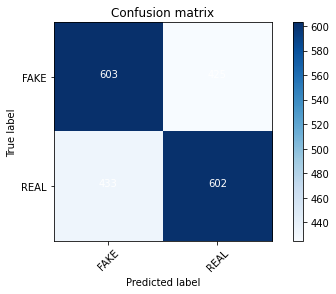

In [58]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [59]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.5841008240426563

In [60]:
y_train.shape

(2481,)

### Passive Aggressive Classifier Algorithm

In [61]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.527
Confusion matrix, without normalization


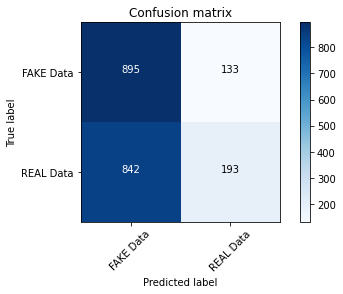

In [62]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [63]:
classifier=MultinomialNB(alpha=0.1)

In [64]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score : 0.5375666505089676
Alpha: 0.1, Score : 0.5773145904023267
Alpha: 0.2, Score : 0.583616093068347
Alpha: 0.30000000000000004, Score : 0.590887057682986
Alpha: 0.4, Score : 0.5933107125545323
Alpha: 0.5, Score : 0.5942801745031507
Alpha: 0.6000000000000001, Score : 0.5991274842462433
Alpha: 0.7000000000000001, Score : 0.5962190984003878
Alpha: 0.8, Score : 0.5918565196316045
Alpha: 0.9, Score : 0.5904023267086767


In [65]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.5904023267086767

In [66]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [67]:
classifier.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-8.99361333, -8.73280922, -8.88239134, ..., -9.23214785,
       -9.10199565, -8.56753858])

In [68]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-5.0946088241108765, 'mr'),
 (-5.330329037097641, 'say'),
 (-5.530613469369316, 'trump'),
 (-6.0447632764256145, 'mr trump'),
 (-6.205313807337017, 'new'),
 (-6.251935834403147, 'presid'),
 (-6.309550592738221, 'state'),
 (-6.337886192635112, 'time'),
 (-6.395959445169988, 'would'),
 (-6.396606472151094, 'one'),
 (-6.411147665734379, 'year'),
 (-6.449308109752382, 'peopl'),
 (-6.511876003277511, 'like'),
 (-6.519785919943152, 'go'),
 (-6.526266121576075, 'breitbart'),
 (-6.537906529432043, 'make'),
 (-6.595117979907021, 'report'),
 (-6.677207663617862, 'also'),
 (-6.68062668764197, 'take'),
 (-6.687725315107411, 'american')]

In [69]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-9.890643721957614, 'alassad'),
 (-9.890643721957614, 'andor'),
 (-9.890643721957614, 'bjp'),
 (-9.890643721957614, 'cji'),
 (-9.890643721957614, 'gaddafi'),
 (-9.890643721957614, 'gold silver'),
 (-9.890643721957614, 'guantanamo'),
 (-9.890643721957614, 'hindutva'),
 (-9.890643721957614, 'ie'),
 (-9.890643721957614, 'imag credit'),
 (-9.890643721957614, 'kadzik'),
 (-9.890643721957614, 'neoconserv'),
 (-9.890643721957614, 'new moon'),
 (-9.890643721957614, 'nofli'),
 (-9.890643721957614, 'nofli zone'),
 (-9.890643721957614, 'nt'),
 (-9.890643721957614, 'pieczenik'),
 (-9.890643721957614, 'pilger'),
 (-9.890643721957614, 'presidentelect'),
 (-9.890643721957614, 'pv'),
 (-9.890643721957614, 'scorpio'),
 (-9.890643721957614, 'selfdefens'),
 (-9.890643721957614, 'share articl'),
 (-9.890643721957614, 'sheepl'),
 (-9.890643721957614, 'splc'),
 (-9.890643721957614, 'ufo'),
 (-9.890643721957614, 'unesco'),
 (-9.890643721957614, 'usl'),
 (-9.890643721957614, 'world order'),
 (-9.88386890530

### GaussianNB Algorithm

In [70]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [71]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.530
Confusion matrix, without normalization


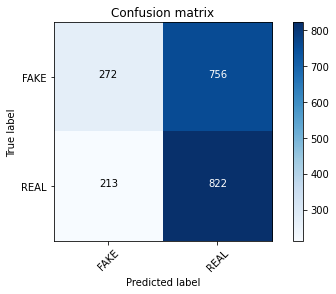

In [72]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [73]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.5302956858943286

### Logistic Regression 

In [74]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [75]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.508
Confusion matrix, without normalization


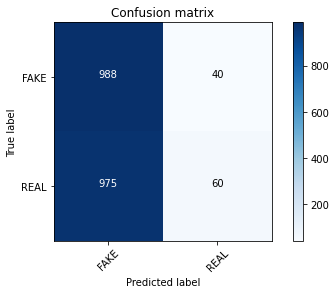

In [76]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [77]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.5079980610761028

### Decision Tree Algorithm

In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [79]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.635
Confusion matrix, without normalization


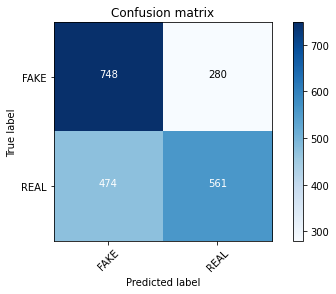

In [80]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [81]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.5419292292777509

### SVM Classifier

In [82]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)

In [83]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.505
Confusion matrix, without normalization


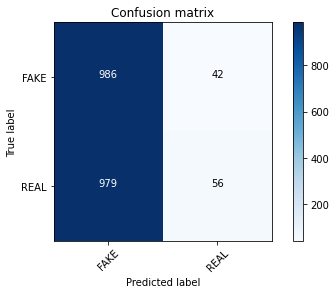

In [84]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### K-Nearest Neighbour Classifier Algorithim

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()

In [86]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.525
Confusion matrix, without normalization


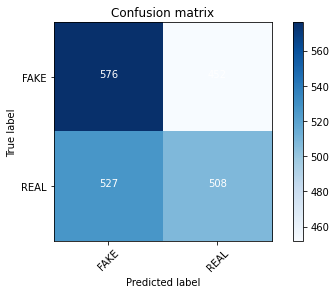

In [87]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [88]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.5254483761512361

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

accuracy:   0.507
Confusion matrix, without normalization


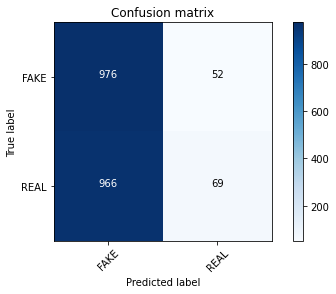

In [90]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

# HashingVectorizer


In [91]:
from sklearn.feature_extraction.text import HashingVectorizer

In [92]:
hs_vectorizer=HashingVectorizer(n_features=5000)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [93]:
X.shape

(2481, 5000)

In [94]:
X_train=X

In [95]:
hs_vectorizer1=HashingVectorizer(n_features=5000)
P=hs_vectorizer1.fit_transform(corpus1).toarray()

In [96]:
P.shape

(2063, 5000)

In [97]:
X_test=P

In [98]:
y_train=messages1['label']

In [99]:
y_train

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
2476    0.0
2477    0.0
2478    1.0
2479    0.0
2480    0.0
Name: label, Length: 2481, dtype: float64

In [100]:
y_test=messages2['label']

In [101]:
y_test

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
2058    0.0
2059    1.0
2060    0.0
2061    0.0
2062    0.0
Name: label, Length: 2063, dtype: float64

In [102]:
X_train, X_test, y_train, y_test  

(array([[ 0.        , -0.01485932,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.10188534],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , -0.0302737 ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        , -0.05337605, -0.02668803, ...,  

### GaussianNB

accuracy:   0.677
Confusion matrix, without normalization


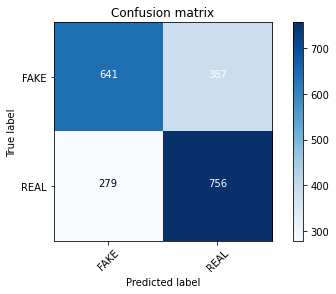

In [103]:

from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [104]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.6771691711100339

### Passive Aggressive Classifier Algorithm

In [105]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.914
Confusion matrix, without normalization


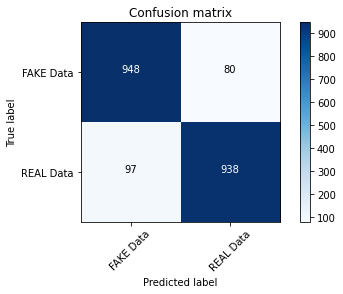

In [106]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [126]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9306834706737761

### Logistic Regression 

In [108]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [109]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.906
Confusion matrix, without normalization


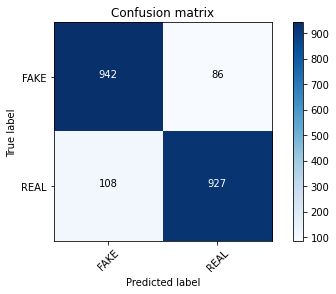

In [110]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [111]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9059621909840039

### Decision Tree Algorithm

In [112]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [113]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.880
Confusion matrix, without normalization


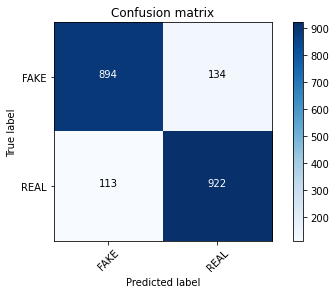

In [114]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [115]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8812409112942317

### SVM Classifier

In [116]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)

In [117]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.923
Confusion matrix, without normalization


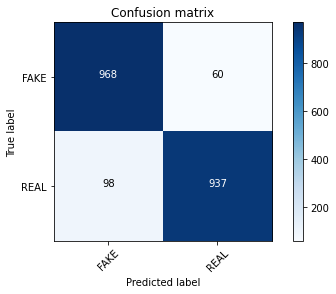

In [118]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [119]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9234125060591372

### K-Nearest Neighbour Classifier Algorithim

In [120]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()

In [121]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.832
Confusion matrix, without normalization


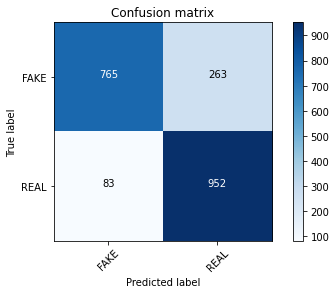

In [122]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [123]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8322830828889967

### Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

accuracy:   0.932
Confusion matrix, without normalization


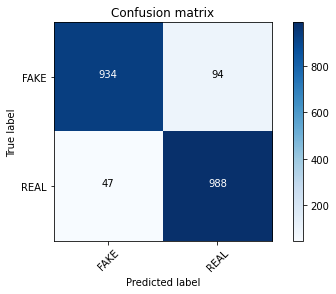

In [125]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])